In [ ]:
# Introduction to Natural Computing and Applications
# Chapter on Artificial Neural Networks

# Prof. Leandro Nunes de Castro
# Florida Gulf Coast Engineering

In [1]:
# Generic Artificial Neuron with varying activation functions
# chosen among Linear, Threshold, and Sigmoid

import numpy as np

class Neuron:
    def __init__(self, num_inputs, activation_function='linear'):
        self.num_inputs = num_inputs
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.activation_function = activation_function

    def linear_activation(self, x):
        return x

    def threshold_activation(self, x):
        threshold = 0
        return 1 if x > threshold else 0

    def sigmoid_activation(self, x):
        return 1 / (1 + np.exp(-x))

    def activate(self, x):
        if self.activation_function == 'linear':
            return self.linear_activation(x)
        elif self.activation_function == 'threshold':
            return self.threshold_activation(x)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid_activation(x)
        else:
            raise ValueError("Invalid activation function")

    def forward(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activate(weighted_sum)

# Example usage:
num_inputs = 3  # Change this value as needed
neuron = Neuron(num_inputs, activation_function='linear')

# Example input values
input_values = np.array([0.5, -1, 2])

# Forward pass through the neuron
output = neuron.forward(input_values)

print(f"Input values: {input_values}")
print(f"Output value: {output}")


Input values: [ 0.5 -1.   2. ]
Output value: 0.01297871031485709


In [ ]:
# Sample experiments to understand the Generic Artificial Neuron

# 1. Effect of Changing Activation Functions:
#    - Set up the neuron with different activation functions ('linear', 'threshold', 'sigmoid').
#    - Provide sample input values and observe the differences in output.
#    - Discuss and compare how each activation function affects the output.

# 2. Influence of Input Weights:
#    - Keep the activation function constant (e.g., 'sigmoid').
#    - Vary the weights assigned to each input and observe the impact on the output.
#    - Discuss how different weights affect the behavior of the neuron.

# 3. Threshold Activation Experiment:
#    - Focus on the threshold activation function.
#    - Adjust the threshold value and observe changes in the output.
#    - Discuss the role of the threshold in determining the neuron's response.

# 4. Random Initialization Sensitivity:
#    - Run the experiment multiple times with the same parameters to observe variations in outputs due to random weight and bias initialization.
#    - Discuss the importance of random initialization in training neural networks.

In [11]:
# Simple Perceptron for Boolean Functions

import numpy as np

class Neuron:
    def __init__(self, num_inputs, activation_function='threshold'):
        self.num_inputs = num_inputs
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.activation_function = activation_function

    def threshold_activation(self, x):
        threshold = 0
        return 1 if x > threshold else 0

    def activate(self, x):
        if self.activation_function == 'threshold':
            return self.threshold_activation(x)
        else:
            raise ValueError("Invalid activation function")

    def forward(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activate(weighted_sum)

# Function to test a logic gate
def test_logic_gate(neuron, gate_name, truth_table):
    print(f"\nTesting {gate_name} gate:")
    for input_values, expected_output in truth_table:
        output = neuron.forward(input_values)
        print(f"{gate_name}({input_values}) = {output}, Expected: {expected_output}")
        assert output == expected_output, f"Test failed for {gate_name} gate with inputs {input_values}"

# Truth tables for logic gates
and_truth_table = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 0),
    (np.array([1, 0]), 0),
    (np.array([1, 1]), 1),
]

or_truth_table = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 1),
    (np.array([1, 0]), 1),
    (np.array([1, 1]), 1),
]

not_truth_table = [
    (np.array([0]), 1),
    (np.array([1]), 0),
]

xor_truth_table = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 1),
    (np.array([1, 0]), 1),
    (np.array([1, 1]), 0),
]

# Neurons for logic gates
and_neuron = Neuron(num_inputs=2, activation_function='threshold')
and_neuron.weights = np.array([0.5, 0.5])
and_neuron.bias = -0.7

or_neuron = Neuron(num_inputs=2, activation_function='threshold')
or_neuron.weights = np.array([0.5, 0.5])
or_neuron.bias = -0.2

not_neuron = Neuron(num_inputs=1, activation_function='threshold')
not_neuron.weights = np.array([-1])
not_neuron.bias = 0.5

#xor_neuron = Neuron(num_inputs=2, activation_function='threshold')

# Testing logic gates
test_logic_gate(and_neuron, 'AND', and_truth_table)
test_logic_gate(or_neuron, 'OR', or_truth_table)
test_logic_gate(not_neuron, 'NOT', not_truth_table)
#test_logic_gate(xor_neuron, 'XOR', xor_truth_table)  # Placeholder for XOR, won't be accurate with a single-layer perceptron



Testing AND gate:
AND([0 0]) = 0, Expected: 0
AND([0 1]) = 0, Expected: 0
AND([1 0]) = 0, Expected: 0
AND([1 1]) = 1, Expected: 1

Testing OR gate:
OR([0 0]) = 0, Expected: 0
OR([0 1]) = 1, Expected: 1
OR([1 0]) = 1, Expected: 1
OR([1 1]) = 1, Expected: 1

Testing NOT gate:
NOT([0]) = 1, Expected: 1
NOT([1]) = 0, Expected: 0


In [ ]:
# Sample experiments to understand the Simple Perceptron

# 1. Modify Thresholds and Biases:
#    - Experiment with different threshold values and biases for each logic gate.
#    - Observe how changing these parameters affects the performance of the perceptron.
#    - Discuss the impact on decision boundaries.

# 2. Implementation of XOR Gate:
#    - Uncomment the XOR neuron and set appropriate weights and biases.
#    - Test the XOR gate using the provided truth table.
#    - Discuss why a single-layer perceptron struggles to learn XOR compared to AND, OR, and NOT gates.

# 3. Generalization Testing:
#    - Create additional truth tables for different boolean functions.
#    - Test the existing perceptrons (AND, OR, NOT) with these new truth tables.
#    - Discuss the limitations of a single-layer perceptron in solving more complex boolean functions.

# 4. Activation Function Exploration:
#    - Modify the code to use the sigmoid activation function.
#    - Test the perceptrons with the sigmoid activation function and compare the results with the threshold activation function.
#    - Discuss the differences in behavior.

# 5. Analysis of Decision Boundaries:
#    - Plot the decision boundaries for each logic gate using different input values.
#    - Discuss how the decision boundaries change based on weights, biases, and activation functions.

# 6. Effect of Input Scaling:
#    - Scale the input values to a different range (e.g., [0, 1] or [-1, 1]) and observe the impact on the perceptron's performance.
#    - Discuss the importance of input scaling in training neural networks.


In [3]:
# Bonus Code

import numpy as np

class Neuron:
    def __init__(self, num_inputs, activation_function='threshold'):
        self.num_inputs = num_inputs
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.activation_function = activation_function

    def threshold_activation(self, x):
        threshold = 0
        return 1 if x > threshold else 0

    def activate(self, x):
        if self.activation_function == 'threshold':
            return self.threshold_activation(x)
        else:
            raise ValueError("Invalid activation function")

    def forward(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activate(weighted_sum)

    def is_xor_neuron(self):
        return self.num_inputs == 2 and np.array_equal(self.weights, np.array([1, 1])) and self.bias == -1

    def forward_xor(self, inputs):
        if self.is_xor_neuron():
            print("XOR is not representable with a single-layer perceptron. Use a multi-layer perceptron.")
            return None
        return self.forward(inputs)

# Function to test a logic gate
def test_logic_gate(neuron, gate_name, truth_table):
    print(f"\nTesting {gate_name} gate:")
    for input_values, expected_output in truth_table:
        output = neuron.forward_xor(input_values)
        if output is not None:
            print(f"{gate_name}({input_values}) = {output}, Expected: {expected_output}")
            assert output == expected_output, f"Test failed for {gate_name} gate with inputs {input_values}"

# Truth tables for logic gates
and_truth_table = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 0),
    (np.array([1, 0]), 0),
    (np.array([1, 1]), 1),
]

or_truth_table = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 1),
    (np.array([1, 0]), 1),
    (np.array([1, 1]), 1),
]

not_truth_table = [
    (np.array([0]), 1),
    (np.array([1]), 0),
]

xor_truth_table = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 1),
    (np.array([1, 0]), 1),
    (np.array([1, 1]), 0),
]

# Neurons for logic gates
and_neuron = Neuron(num_inputs=2, activation_function='threshold')
and_neuron.weights = np.array([0.5, 0.5])
and_neuron.bias = -0.7

or_neuron = Neuron(num_inputs=2, activation_function='threshold')
or_neuron.weights = np.array([0.5, 0.5])
or_neuron.bias = -0.2

not_neuron = Neuron(num_inputs=1, activation_function='threshold')
not_neuron.weights = np.array([-1])
not_neuron.bias = 0.5

xor_neuron = Neuron(num_inputs=2, activation_function='threshold')
xor_neuron.weights = np.array([1, 1])
xor_neuron.bias = -1

# Testing logic gates
test_logic_gate(and_neuron, 'AND', and_truth_table)
test_logic_gate(or_neuron, 'OR', or_truth_table)
test_logic_gate(not_neuron, 'NOT', not_truth_table)
test_logic_gate(xor_neuron, 'XOR', xor_truth_table)  # Displays an error message for XOR



Testing AND gate:
AND([0 0]) = 0, Expected: 0
AND([0 1]) = 0, Expected: 0
AND([1 0]) = 0, Expected: 0
AND([1 1]) = 1, Expected: 1

Testing OR gate:
OR([0 0]) = 0, Expected: 0
OR([0 1]) = 1, Expected: 1
OR([1 0]) = 1, Expected: 1
OR([1 1]) = 1, Expected: 1

Testing NOT gate:
NOT([0]) = 1, Expected: 1
NOT([1]) = 0, Expected: 0

Testing XOR gate:
XOR is not representable with a single-layer perceptron. Use a multi-layer perceptron.
XOR is not representable with a single-layer perceptron. Use a multi-layer perceptron.
XOR is not representable with a single-layer perceptron. Use a multi-layer perceptron.
XOR is not representable with a single-layer perceptron. Use a multi-layer perceptron.


In [13]:
# Extended Hebbian Network

import numpy as np

class ExtendedHebbianNetwork:
    def __init__(self, input_size, output_size):
        self.weights = np.zeros((output_size, input_size))
    
    def train(self, input_pattern, output_pattern):
        # Apply the Extended Hebbian learning rule
        self.weights += np.outer(output_pattern, input_pattern)
    
    def predict(self, input_pattern):
        # Calculate the output using the learned weights
        return np.dot(self.weights, input_pattern)

def boolean_to_binary(boolean_value):
    return 1 if boolean_value else 0

def binary_to_boolean(binary_value):
    return binary_value > 0.5

def main():
    # Define the boolean functions for testing
    boolean_functions = {
        "AND": lambda a, b: a and b,
        "OR": lambda a, b: a or b,
        "XOR": lambda a, b: (a or b) and not (a and b)
    }

    # Choose the boolean function for training and testing
    selected_function = "AND"
    boolean_function = boolean_functions[selected_function]

    # Generate training data
    training_data = [
        (np.array([boolean_to_binary(a), boolean_to_binary(b)]), np.array([boolean_to_binary(boolean_function(a, b))]))
        for a in [0, 1] for b in [0, 1]
    ]

    # Create and train the Extended Hebbian Network
    input_size = 2
    output_size = 1
    hebbian_net = ExtendedHebbianNetwork(input_size, output_size)

    for input_pattern, output_pattern in training_data:
        hebbian_net.train(input_pattern, output_pattern)

    # Test the network
    test_data = [
        (np.array([boolean_to_binary(a), boolean_to_binary(b)]))
        for a in [0, 1] for b in [0, 1]
    ]

    print(f"Testing the network for {selected_function} function:")
    for input_pattern in test_data:
        output = hebbian_net.predict(input_pattern)
        predicted_boolean = binary_to_boolean(output[0])
        print(f"Input: {input_pattern}, Predicted Output: {predicted_boolean}")

if __name__ == "__main__":
    main()



Testing the network for AND function:
Input: [0 0], Predicted Output: False
Input: [0 1], Predicted Output: True
Input: [1 0], Predicted Output: True
Input: [1 1], Predicted Output: True


In [ ]:
# Sample experiments to understand the Extended Hebbian Network

# 1. Training on Different Boolean Functions:
#    - Change the 'selected_function' to "OR" or "XOR" and observe how well the network adapts.
#    - Discuss the differences in the learned weights for each boolean function.

# 2. Impact of Input Patterns:
#    - Create new input patterns (e.g., (0, 1), (1, 0), (1, 1), (0, 0)) and test the network.
#    - Analyze how the network performs on patterns not seen during training.

# 3. Introduce Noise in Training Data:
#    - Add random noise to the training data (e.g., flip some output bits) and observe the impact on learning.
#    - Discuss the network's robustness to noisy training data.

# 4. Evaluate Generalization:
#    - Train the network on a subset of the input patterns and test on the remaining patterns.
#    - Discuss the network's ability to generalize to unseen patterns.

# 5. Vary Network Size:
#    - Change the size of the output layer (e.g., increase to 2) and observe how it affects learning and prediction.
#    - Discuss the implications of having more output units.

# 6. Experiment with Non-Boolean Functions:
#    - Define and test the network on a non-boolean function (e.g., multiplication or addition).
#    - Discuss the limitations and potential applications of the Extended Hebbian Network.


In [28]:
# Bonus Code

import numpy as np

class ExtendedHebbianNetwork:
    def __init__(self, input_size, output_size):
        self.weights = np.zeros((output_size, input_size))
    
    def train(self, input_pattern, output_pattern):
        # Apply the Extended Hebbian learning rule
        self.weights += np.outer(output_pattern, input_pattern)
    
    def predict(self, input_pattern):
        # Calculate the output using the learned weights
        return np.dot(self.weights, input_pattern)

def boolean_to_binary(boolean_value):
    return 1 if boolean_value else -1

def binary_to_boolean(binary_value):
    return binary_value > 0

def get_user_input(message):
    return input(message)

def main():
    # Define the boolean functions for testing
    boolean_functions = {
        "AND": lambda a, b: a and b,
        "OR": lambda a, b: a or b,
        "XOR": lambda a, b: (a or b) and not (a and b)
    }

    # Get user input for input type (binary or boolean)
    input_type = get_user_input("Enter input type (binary or boolean): ").lower()

    if input_type not in ["binary", "boolean"]:
        print("Invalid input type. Please enter 'binary' or 'boolean'.")
        return

    # Get user input for the boolean function
    selected_function = get_user_input("Enter boolean function (AND, OR, XOR): ").upper()

    if selected_function not in ["AND", "OR", "XOR"]:
        print("Invalid boolean function. Please enter 'AND', 'OR', or 'XOR'.")
        return

    # Generate training data
    if input_type == "boolean":
        training_data = [
            (np.array([boolean_to_binary(a), boolean_to_binary(b)]), boolean_to_binary(boolean_functions[selected_function](a, b)))
            for a in [False, True] for b in [False, True]
        ]
    else:
        training_data = [
            (np.array([a, b]), boolean_to_binary(boolean_functions[selected_function](binary_to_boolean(a), binary_to_boolean(b))))
            for a in [0, 1] for b in [0, 1]
        ]

    # Create and train the Extended Hebbian Network
    input_size = 2
    output_size = 1
    hebbian_net = ExtendedHebbianNetwork(input_size, output_size)

    for input_pattern, output_pattern in training_data:
        hebbian_net.train(input_pattern, output_pattern)

    # Test the network
    if input_type == "boolean":
        test_data = [
            np.array([boolean_to_binary(a), boolean_to_binary(b)])
            for a in [False, True] for b in [False, True]
        ]
    else:
        test_data = [
            np.array([a, b])
            for a in [0, 1] for b in [0, 1]
        ]

    print(f"Testing the network for {selected_function} function:")
    for input_pattern in test_data:
        output = hebbian_net.predict(input_pattern)
        predicted_boolean = binary_to_boolean(output[0])
        print(f"Input: {input_pattern}, Predicted Output: {predicted_boolean}")

if __name__ == "__main__":
    main()

Enter input type (binary or boolean): boolean
Enter boolean function (AND, OR, XOR): xor
Testing the network for XOR function:
Input: [-1 -1], Predicted Output: False
Input: [-1  1], Predicted Output: False
Input: [ 1 -1], Predicted Output: False
Input: [1 1], Predicted Output: False


In [30]:
# Simple Perceptron Network

import numpy as np

class SinglePerceptronNetwork:
    def __init__(self, input_size, output_size, initialize_weights='zeros'):
        if initialize_weights == 'zeros':
            self.weights = np.zeros((output_size, input_size))
        elif initialize_weights == 'random':
            self.weights = np.random.rand(output_size, input_size) * 0.1
        else:
            raise ValueError("Invalid value for initialize_weights. Use 'zeros' or 'random'.")
    
    def train(self, input_pattern, output_pattern, learning_rate=0.1):
        # Apply the single perceptron learning rule
        predicted_output = self.predict(input_pattern)
        self.weights += learning_rate * np.outer(output_pattern - predicted_output, input_pattern)
    
    def predict(self, input_pattern):
        # Calculate the output using the learned weights
        return np.dot(self.weights, input_pattern)

def boolean_to_binary(boolean_value):
    return 1 if boolean_value else -1

def binary_to_boolean(binary_value):
    return binary_value > 0

def get_user_input(message):
    return input(message)

def main():
    # Define the boolean functions for testing
    boolean_functions = {
        "AND": lambda a, b: a and b,
        "OR": lambda a, b: a or b,
        "XOR": lambda a, b: (a or b) and not (a and b)
    }

    # Get user input for input type (binary or boolean)
    input_type = get_user_input("Enter input type (binary or boolean): ").lower()

    if input_type not in ["binary", "boolean"]:
        print("Invalid input type. Please enter 'binary' or 'boolean'.")
        return

    # Get user input for the boolean function
    selected_function = get_user_input("Enter boolean function (AND, OR, XOR): ").upper()

    if selected_function not in ["AND", "OR", "XOR"]:
        print("Invalid boolean function. Please enter 'AND', 'OR', or 'XOR'.")
        return

    # Get user input for weight initialization
    initialize_weights = get_user_input("Enter weight initialization (zeros or random): ").lower()

    if initialize_weights not in ["zeros", "random"]:
        print("Invalid weight initialization. Please enter 'zeros' or 'random'.")
        return

    # Generate training data
    if input_type == "boolean":
        training_data = [
            (np.array([boolean_to_binary(a), boolean_to_binary(b)]), boolean_to_binary(boolean_functions[selected_function](a, b)))
            for a in [False, True] for b in [False, True]
        ]
    else:
        training_data = [
            (np.array([a, b]), boolean_to_binary(boolean_functions[selected_function](binary_to_boolean(a), binary_to_boolean(b))))
            for a in [0, 1] for b in [0, 1]
        ]

    # Create and train the Single Perceptron Network
    input_size = 2
    output_size = 1
    perceptron_net = SinglePerceptronNetwork(input_size, output_size, initialize_weights)

    for input_pattern, output_pattern in training_data:
        perceptron_net.train(input_pattern, output_pattern)

    # Test the network
    if input_type == "boolean":
        test_data = [
            np.array([boolean_to_binary(a), boolean_to_binary(b)])
            for a in [False, True] for b in [False, True]
        ]
    else:
        test_data = [
            np.array([a, b])
            for a in [0, 1] for b in [0, 1]
        ]

    print(f"Testing the network for {selected_function} function:")
    for input_pattern in test_data:
        output = perceptron_net.predict(input_pattern)
        predicted_boolean = binary_to_boolean(output[0])
        print(f"Input: {input_pattern}, Predicted Output: {predicted_boolean}")

if __name__ == "__main__":
    main()


Enter input type (binary or boolean): boolean
Enter boolean function (AND, OR, XOR): xor
Enter weight initialization (zeros or random): random
Testing the network for XOR function:
Input: [-1 -1], Predicted Output: True
Input: [-1  1], Predicted Output: False
Input: [ 1 -1], Predicted Output: True
Input: [1 1], Predicted Output: False


In [ ]:
# Experiments to understand the Simple Perceptron Network

# 1. Effect of Learning Rate:
#    - Modify the learning rate in the 'train' method and observe its impact on the convergence speed and final weights.
#    - Discuss the trade-offs between larger and smaller learning rates.

# 2. Testing on Other Boolean Functions:
#    - Change the boolean function to "OR" or "XOR" and observe how well the perceptron adapts.
#    - Discuss the challenges the perceptron might face in learning more complex functions.

# 3. Visualizing Decision Boundary:
#    - For 2D inputs, visualize the decision boundary created by the learned weights.
#    - Discuss how the decision boundary changes during training.

# 4. Initialization Impact:
#    - Compare the performance of the perceptron with zero-initialized weights and randomly initialized weights.
#    - Discuss how initialization impacts convergence and final weights.

# 5. Testing with Different Input Types:
#    - Change the input type (binary or boolean) and observe the network's behavior.
#    - Discuss any differences in convergence or final accuracy.


In [78]:
# Single Layer Perceptron (SLP) network for pattern recognition

import matplotlib.pyplot as plt
import numpy as np

class PerceptronNetwork:
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(output_size, input_size)
    
    def train(self, input_pattern, target_output, learning_rate=0.1):
        predicted_output = self.predict(input_pattern)
        self.weights += learning_rate * np.outer(target_output - predicted_output, input_pattern)
    
    def predict(self, input_pattern):
        return np.dot(self.weights, input_pattern)

def add_noise(input_pattern, noise_level): # Binary inputs
    noisy_pattern = np.copy(input_pattern)
    num_bits_to_flip = int(noise_level * len(input_pattern))
    indices_to_flip = np.random.choice(len(input_pattern), num_bits_to_flip, replace=False)
    noisy_pattern[indices_to_flip] = 1 - noisy_pattern[indices_to_flip]  # Flip bits
    return noisy_pattern

def generate_training_data():
    training_data = []
    for i in range(10):
        input_pattern = np.zeros(120)
        input_pattern[i*12:(i+1)*12] = 1  
        target_output = np.zeros(10)
        target_output[i] = 1
        training_data.append((input_pattern, target_output))
    return training_data

# Generate training data
training_data = generate_training_data()

# Create and train the Perceptron Network
input_size = 120  # 12x10 resolution
output_size = 10  # 10 output neurons, one for each input (0 to 9)
perceptron_net = PerceptronNetwork(input_size, output_size)

for input_pattern, target_output in training_data:
    perceptron_net.train(input_pattern, target_output)
    #print(input_pattern) # Print the input pattern
    #print(target_output) # Print the target output
    
# Test the network with noise
noise_level = 0  # You can adjust the noise level as needed
for input_pattern, target_output in training_data:
    noisy_input_pattern = add_noise(input_pattern, noise_level)
    output = perceptron_net.predict(noisy_input_pattern)
    predicted_digit = np.argmax(output)
    actual_digit = np.argmax(target_output)
    print(f"Actual Pattern: {actual_digit}, Predicted Pattern: {predicted_digit}")


Actual Pattern: 0, Predicted Pattern: 0
Actual Pattern: 1, Predicted Pattern: 1
Actual Pattern: 2, Predicted Pattern: 2
Actual Pattern: 3, Predicted Pattern: 3
Actual Pattern: 4, Predicted Pattern: 4
Actual Pattern: 5, Predicted Pattern: 5
Actual Pattern: 6, Predicted Pattern: 6
Actual Pattern: 7, Predicted Pattern: 7
Actual Pattern: 8, Predicted Pattern: 8
Actual Pattern: 9, Predicted Pattern: 9


In [ ]:
# Sample experiments to understand the Simple Perceptron Network for Pattern Recognition

# 1. Reading Input Patterns:
#     - Modify the Single Layer Perceptron algorithm above to read the input file named char_8_12x10.txt and learn to recognize them. (See bonus code below)
#     - The network must have one output neuron for each input pattern.

# 2. Adding Noise to Data:
#     - Introduce random noise to the test data and observe how well the perceptron generalizes. (See bonus code below)
#     - Discuss the robustness of the perceptron to noisy data. Test different noise levels: {0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6}


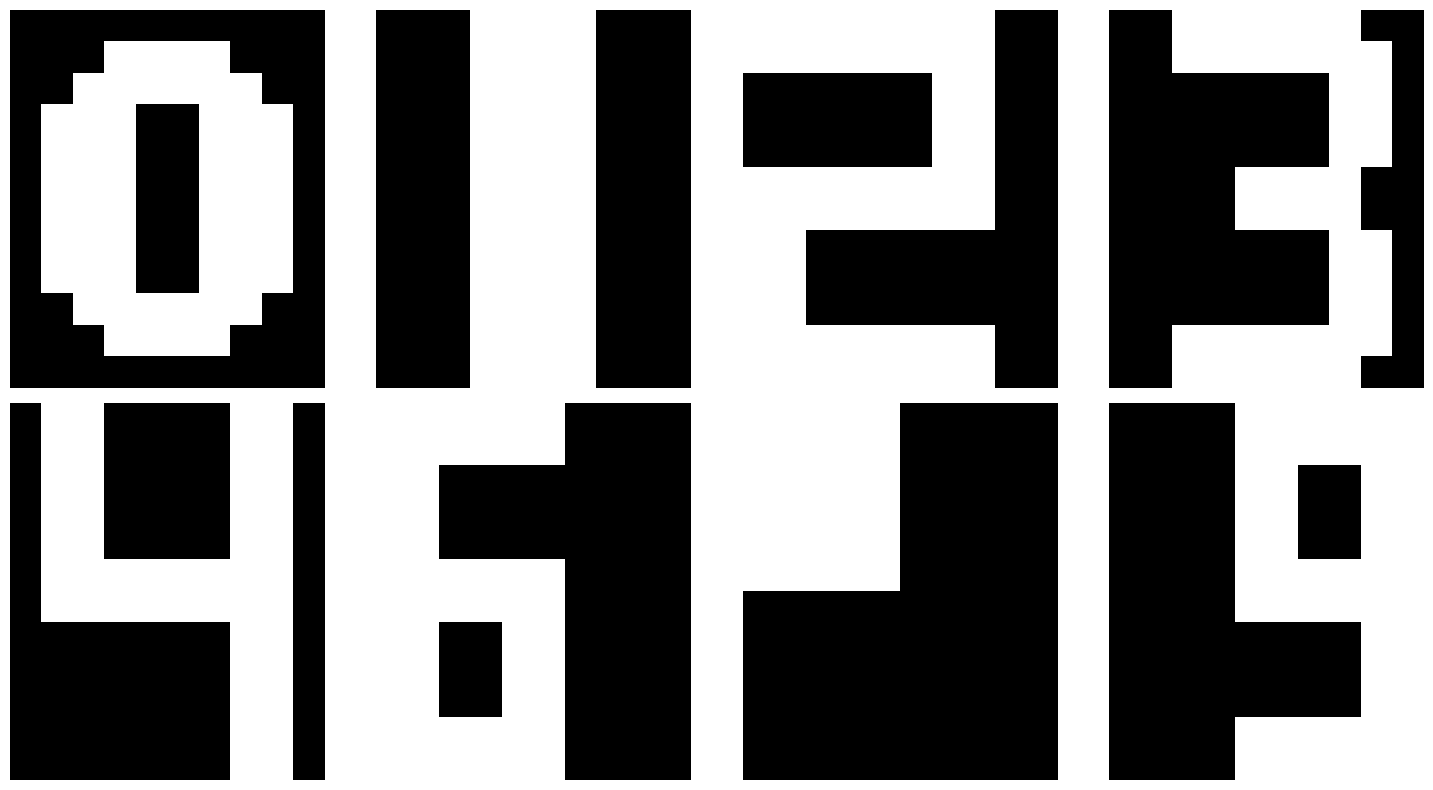

In [79]:
# Bonus Code to read the input char8_12x10.txt file and plot a picture with the characters

import matplotlib.pyplot as plt
import numpy as np

def plot_binary_images(matrix):
    num_characters = len(matrix)
    num_rows = 2
    num_cols = (num_characters + 1) // num_rows

    plt.figure(figsize=(15, 8))

    for i, bitstring in enumerate(matrix, 1):
        plt.subplot(num_rows, num_cols, i)
        plot_binary_image(bitstring)

    plt.tight_layout()
    plt.show()

def plot_binary_image(bitstring):
    rows = 12
    cols = 10
    bits_matrix = np.array(list(bitstring), dtype=int).reshape(rows, 10)

    plt.imshow(bits_matrix, cmap='gray', interpolation='nearest')
    plt.axis('off')

def read_txt_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Assuming characters are separated by spaces in each line
    matrix = [list(line.split()) for line in lines]
    
    # Transpose the matrix to have characters in columns
    transposed_matrix = list(map(list, zip(*matrix)))
    
    return transposed_matrix

# Replace 'your_file_path.txt' with the path to your .txt file
file_path = 'char8_12x10.txt'
boolean_matrix = read_txt_file(file_path)
#print(boolean_matrix)

# Plot the binary images
plot_binary_images(boolean_matrix)


Original input patterns:


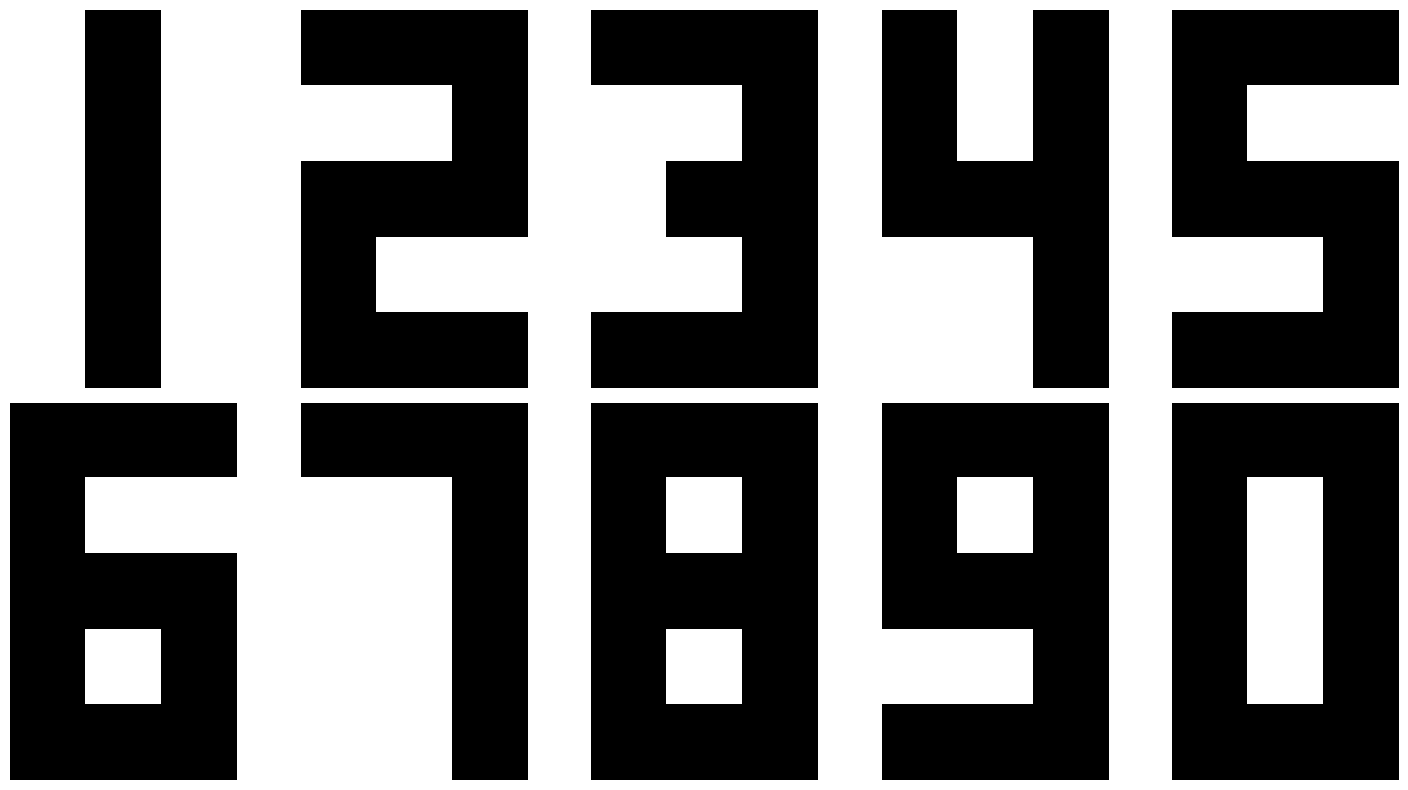

Noisy patterns with noise Level = 0.1


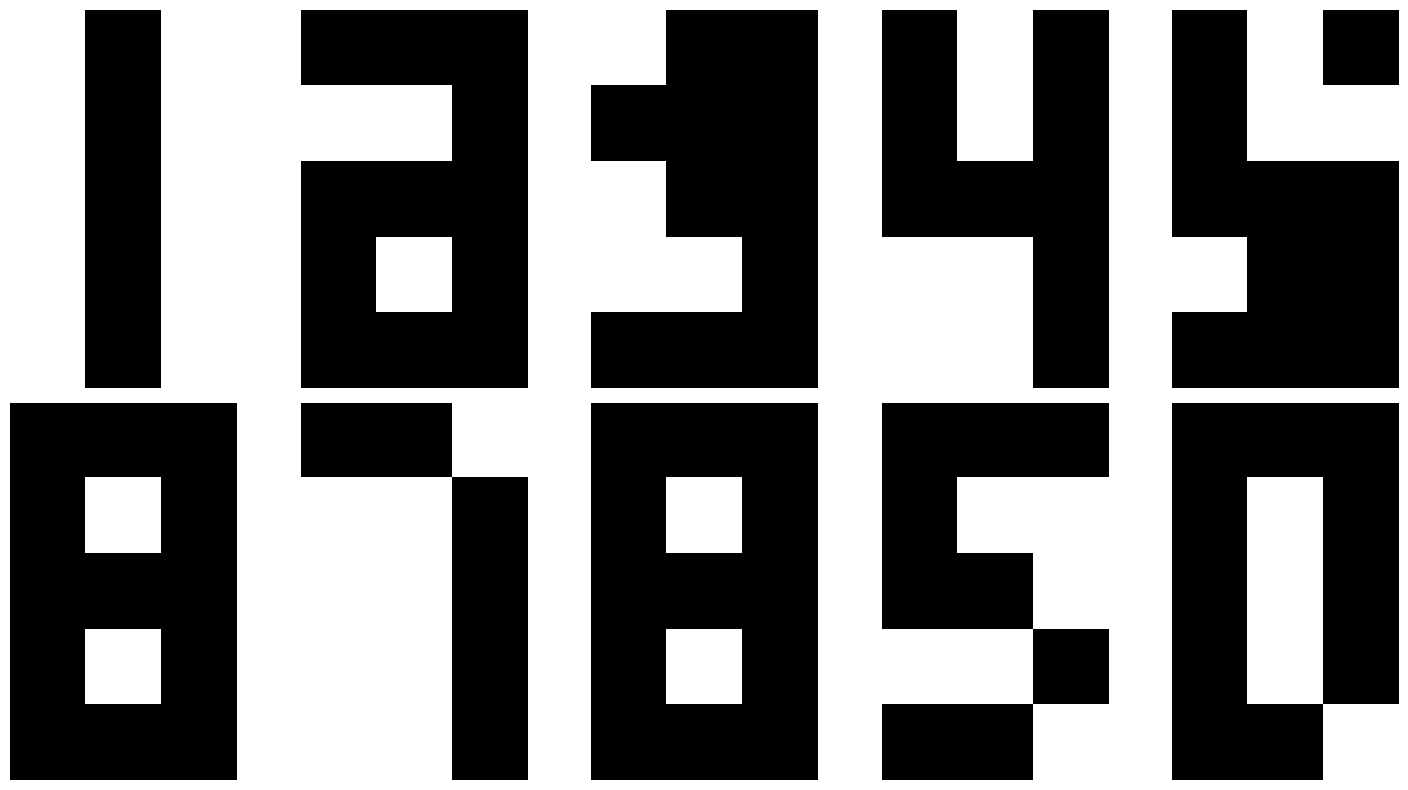

In [81]:
# Bonus Code
# Code to plot a matrix of characters with noise

import numpy as np
import matplotlib.pyplot as plt

def plot_binary_images(matrix):
    num_characters = len(matrix)
    num_rows = 2
    num_cols = (num_characters + 1) // num_rows

    plt.figure(figsize=(15, 8))

    for i, bitstring in enumerate(matrix, 1):
        plt.subplot(num_rows, num_cols, i)
        plot_binary_image(bitstring)

    plt.tight_layout()
    plt.show()

def plot_binary_image(bitstring):
    rows = 5
    cols = len(bitstring) // 3
    bits_matrix = np.array(list(bitstring), dtype=int).reshape(rows, 3)

    plt.imshow(bits_matrix, cmap='gray', interpolation='nearest')
    plt.axis('off')

def insert_noise(bitstring, noise_level):
#     """
#     Insert random noise into the given bitstring with a specified noise level.
#     The noise level is the probability of flipping each bit.
#     """
    noisy_bitstring = ""
    for bit in bitstring:
        if np.random.rand() < noise_level:
            noisy_bitstring += '1' if bit == '0' else '0'
        else:
            noisy_bitstring += bit
    return noisy_bitstring

# Example usage with the target matrix and noise level
target_matrix = [
    "101101101101101",
    "000110000011000",
    "000110100110000",
    "010010000110110",
    "000011000110000",
    "000011000010000",
    "000110110110110",
    "000010000010000",
    "000010000110000",
    "000010010010000"
]

noise_level = 0.1  # You can adjust the noise level as needed

noisy_matrix = [insert_noise(bitstring, noise_level) for bitstring in target_matrix]

print('Original input patterns:')
plot_binary_images(target_matrix)
print(f"Noisy patterns with noise Level = {noise_level}")
plot_binary_images(noisy_matrix)
